<a href="https://colab.research.google.com/github/ABoyarskov/ML/blob/main/horse_racing_hk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Horse Racing in HK

Выбранный набор данных о результатах скачек в Гонконге будет использован в качестве предсказания победителя в данном забеге

Используемые сокращения :
1. `race_id` - уникальный идентификатор расы

2. `horse_no` - номер, присвоенный этой лошади, в гонке

3. `horse_id` - уникальный идентификатор этой лошади

4. `result` - финишное место этой лошади в скачках

5. `won` - выиграла ли лошадь (1) или нет (0)

6. `lengths_behind` - финишная позиция, как количество длин лошади позади победителя

7. `horse_age` - текущий возраст этой лошади на момент скачек

8. `horse_country` - страна происхождения этой лошади

9. `horse_type` - пол лошади, например 'Gelding', 'Mare', 'Horse', 'Rig', 'Colt', 'Filly'

10. `horse_rating` - номер рейтинга, присвоенный HKJC этой лошади во время скачек

11. `horse_gear` - строка, представляющая снаряжение, которое несет лошадь в гонке

12. `declared_weight` - заявленный вес лошади и жокея в фунтах

13. `actual_weight` - фактический вес лошади в фунтах

14. `draw` - номер позиции лошади в этой гонке

15. `position_sec1` - позиция этой лошади (рейтинг) в 1-м разделе скачек

16. `position_sec2` - позиция этой лошади (рейтинг) во 2-м разделе скачек

17. `position_sec3` - позиция этой лошади (рейтинг) в 3-м разделе скачек

18. `position_sec4` - позиция этой лошади (рейтинг) в 4 разделе скачек, если есть

19. `position_sec5` - позиция этой лошади (рейтинг) в 5 разделе скачек, если есть

20. `position_sec6` - позиция этой лошади (рейтинг) в 6 разделе скачек, если есть

21. `behind_sec1` - позиция этой лошади (длины позади лидера) в 1-м участке забега

22. `behind_sec2` - позиция этой лошади (длины позади лидера) в 2-м участке забега

23. `behind_sec3` - позиция этой лошади (длины позади лидера) в 3-м участке забега

24. `behind_sec4` - позиция этой лошади (длины позади лидера) в 4-м участке забега

25. `behind_sec5` - позиция этой лошади (длины позади лидера) в 5-м участке забега

26. `behind_sec6` - позиция этой лошади (длины позади лидера) в 6-м участке забега

27. `time1` - время прохождения лошадью 1-го участка забега (сек)

28. `time2` - время прохождения лошадью 2-го участка забега (сек)

29. `time3` - время прохождения лошадью 3-го участка забега (сек)

30. `time4` - время прохождения лошадью 4-го участка забега, если он есть (сек)

31. `time5` - время прохождения лошадью 5-го участка забега, если он есть (сек)

32. `time6` - время прохождения лошадью 6-го участка забега, если он есть (сек)

33. `finish_time` - финишное время лошади в этом забеге (сек)

34. `win_odds` - коэффициент выигрыша для этой лошади в начале скачек

35. `place_odds` - коэффициент места (занявшего 1-е, 2-е или 3-е место) для этой лошади на старте скачек

36. `trainer_id` - уникальный идентификатор тренера лошади на момент скачек

37. `jockey_id` - уникальный идентификатор жокея, едущего на лошади в этой гонке

# Чтение данных

In [ ]:
import pandas as pd
data = pd.read_csv('/content/sample_data/runs.csv')
data.shape

(79447, 37)

Ознакомимся с информацией, хранящейся в наборе данных, на основе некоторых записей

In [ ]:
data.sample(5)

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
24060,1917,10,3592,4,0.0,1.25,3,IRE,Gelding,60,...,23.20,24.03,23.82,22.73,NaN,108.70,99.0,27.0,38,40
34198,2730,10,3383,10,0.0,10.25,3,AUS,Gelding,60,...,22.65,24.87,NaN,NaN,NaN,71.02,21.0,4.2,47,39
16085,1281,10,494,11,0.0,3.50,3,NZ,Gelding,60,...,23.52,24.20,22.86,NaN,NaN,96.05,18.0,4.6,138,34
67241,5375,1,3270,6,0.0,3.00,7,IRE,Gelding,77,...,23.89,22.27,NaN,NaN,NaN,71.35,10.0,2.7,98,150
46419,3706,6,3886,2,0.0,0.20,3,AUS,Gelding,60,...,21.98,23.34,22.72,NaN,NaN,81.71,6.5,2.0,164,93


Подробная информация о столбцах набора данных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79447 entries, 0 to 79446
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   race_id          79447 non-null  int64  
 1   horse_no         79447 non-null  int64  
 2   horse_id         79447 non-null  int64  
 3   result           79447 non-null  int64  
 4   won              79447 non-null  float64
 5   lengths_behind   79447 non-null  float64
 6   horse_age        79447 non-null  int64  
 7   horse_country    79445 non-null  object 
 8   horse_type       79445 non-null  object 
 9   horse_rating     79447 non-null  int64  
 10  horse_gear       79447 non-null  object 
 11  declared_weight  79447 non-null  float64
 12  actual_weight    79447 non-null  int64  
 13  draw             79447 non-null  int64  
 14  position_sec1    79447 non-null  int64  
 15  position_sec2    79447 non-null  int64  
 16  position_sec3    79447 non-null  int64  
 17  position_sec

По полученному описанию можно определить наличие пропущенных значений, три категориальных признака : horse_country, horse_type, horse_gear, остальные являются количественными, один из них won - класс, который нужно предсказать 

In [ ]:
data.horse_country = data.horse_country.astype('category')
data.horse_country.dtype 

CategoricalDtype(categories=['ARG', 'AUS', 'BRZ', 'CAN', 'FR', 'GB', 'GER', 'GR', 'IRE',
                  'ITY', 'JPN', 'NZ', 'SAF', 'SPA', 'USA', 'ZIM'],
, ordered=False)

In [ ]:
data.horse_type = data.horse_type.astype('category')
data.horse_type.dtype

CategoricalDtype(categories=['Brown', 'Colt', 'Filly', 'Gelding', 'Grey', 'Horse', 'Mare',
                  'Rig', 'Roan'],
, ordered=False)

Признаки `horse_country` и `horse_type` теперь категориального типа

Удалим `horse_gear` из набора данных, поскольку не содержит полезной информации и сложно привести к категориальному типу

In [ ]:
data.drop(['horse_gear'], axis=1, inplace=True)

# Визуализация и основные характеристики

Математическое описание для каждого столбца

In [ ]:
data.describe()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_rating,declared_weight,actual_weight,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
count,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,...,79447.000000,79447.000000,46226.000000,10079.000000,1296.000000,79447.000000,79447.000000,75712.000000,79447.000000,79447.000000
mean,3173.352814,6.905623,2204.410525,6.838597,0.080053,6.108901,3.339346,61.034904,1104.953568,122.729656,...,22.928985,23.864054,24.039662,24.105221,24.350216,85.322914,28.812977,7.423177,79.793007,85.832341
std,1833.101494,3.760711,1275.049375,3.730498,0.271378,33.636209,0.876763,11.748788,62.347597,6.305496,...,3.599727,3.571163,4.663367,1.127963,1.314755,18.512883,30.097375,8.823430,45.118874,54.338105
min,0.000000,1.000000,0.000000,1.000000,0.000000,-0.500000,2.000000,10.000000,693.000000,103.000000,...,19.990000,21.000000,21.200000,21.420000,21.500000,55.160000,1.000000,1.000000,0.000000,0.000000
25%,1586.000000,4.000000,1085.000000,4.000000,0.000000,1.750000,3.000000,60.000000,1062.000000,118.000000,...,22.290000,23.230000,23.320000,23.410000,23.570000,70.590000,7.700000,2.400000,47.000000,39.000000
50%,3174.000000,7.000000,2209.000000,7.000000,0.000000,4.000000,3.000000,60.000000,1102.000000,123.000000,...,22.870000,23.760000,23.890000,23.960000,24.120000,83.350000,15.000000,4.100000,75.000000,76.000000
75%,4764.500000,10.000000,3308.000000,10.000000,0.000000,6.750000,3.000000,60.000000,1146.000000,128.000000,...,23.520000,24.410000,24.560000,24.630000,24.820000,100.780000,38.000000,8.600000,118.000000,138.000000
max,6348.000000,14.000000,4404.000000,14.000000,1.000000,999.000000,10.000000,138.000000,1369.000000,133.000000,...,999.000000,999.000000,999.000000,49.570000,34.150000,163.580000,99.000000,101.000000,175.000000,185.000000


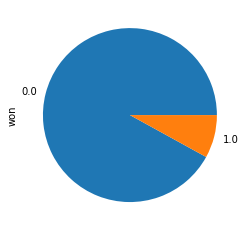

In [ ]:
import matplotlib.pyplot as plt
data.won.value_counts().plot.pie()
pass

По изображенной диаграмме выборка несбалансированная

Корреляционная матрица

In [ ]:
corr = data.corr()
corr

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_rating,declared_weight,actual_weight,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
race_id,1.000000,0.000104,-0.053543,-0.000257,0.000136,-0.039257,0.446711,0.058439,0.044864,0.048939,...,-0.004778,-0.013122,-0.011789,-0.087488,0.000602,-0.027027,0.041778,0.037380,-0.008199,-0.038754
horse_no,0.000104,1.000000,0.003719,0.111750,-0.052069,0.009799,-0.016498,-0.146383,-0.044488,-0.800251,...,-0.004873,-0.005351,-0.001640,0.037685,0.064552,0.002032,0.200639,0.183137,-0.001638,0.080821
horse_id,-0.053543,0.003719,1.000000,0.000164,-0.002705,-0.001623,-0.015791,0.006833,-0.010505,-0.012989,...,0.008285,-0.000212,-0.003797,-0.029144,-0.050395,0.009712,0.000669,-0.000737,0.030353,0.012847
result,-0.000257,0.111750,0.000164,1.000000,-0.461693,0.161916,-0.023854,-0.028626,-0.034051,-0.094573,...,0.003443,0.051684,0.095199,0.445645,0.541016,0.031713,0.470562,0.439904,-0.003864,0.090888
won,0.000136,-0.052069,-0.002705,-0.461693,1.000000,-0.053576,-0.004351,0.013983,0.028933,0.051097,...,-0.003140,-0.019687,-0.032706,-0.156298,-0.192921,-0.012723,-0.190790,-0.156188,0.005300,-0.052743
lengths_behind,-0.039257,0.009799,-0.001623,0.161916,-0.053576,1.000000,-0.016083,-0.008669,-0.001053,-0.010793,...,0.003326,0.031833,0.062982,0.322859,0.371351,0.037315,0.089541,0.089060,0.000617,0.013628
horse_age,0.446711,-0.016498,-0.015791,-0.023854,-0.004351,-0.016083,1.000000,0.045588,0.008069,0.006164,...,0.015264,0.003053,-0.009304,-0.035739,0.011548,0.079138,-0.022757,-0.046705,-0.027479,-0.018440
horse_rating,0.058439,-0.146383,0.006833,-0.028626,0.013983,-0.008669,0.045588,1.000000,0.069133,0.078515,...,-0.011574,-0.027716,-0.035384,-0.189684,-0.134354,-0.002670,0.000412,-0.010425,-0.018327,-0.037309
declared_weight,0.044864,-0.044488,-0.010505,-0.034051,0.028933,-0.001053,0.008069,0.069133,1.000000,0.041835,...,-0.033334,-0.018977,-0.002326,0.025586,0.087345,-0.112496,-0.062057,-0.071939,-0.019791,-0.021570
actual_weight,0.048939,-0.800251,-0.012989,-0.094573,0.051097,-0.010793,0.006164,0.078515,0.041835,1.000000,...,0.001848,-0.001202,-0.010557,-0.033840,-0.038698,0.007860,-0.200862,-0.173438,-0.006755,-0.061492


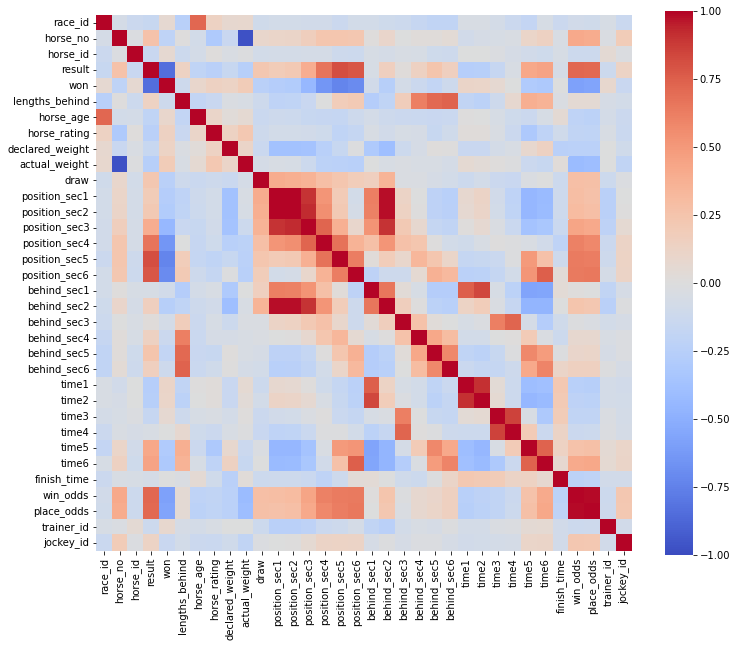

In [ ]:
import seaborn as sns
plt.subplots(figsize=(12, 10))
sns.heatmap(corr.corr(), square=True, vmin = -1, vmax = 1, cmap='coolwarm')
pass

Получим список признаков, в которых наблюдается корреляция

In [ ]:
import numpy as np
corr.where(np.triu(corr > 0.5, k=1)).stack().sort_values(ascending = False)

lengths_behind  behind_sec6      0.999983
result          position_sec6    0.999934
time3           time4            0.972970
position_sec1   position_sec2    0.928896
result          position_sec5    0.918706
win_odds        place_odds       0.880301
lengths_behind  behind_sec4      0.876373
behind_sec3     time4            0.856275
position_sec2   behind_sec2      0.848470
result          position_sec4    0.839848
behind_sec1     time2            0.829744
position_sec1   behind_sec2      0.799990
lengths_behind  behind_sec5      0.794927
position_sec2   position_sec3    0.724334
position_sec3   behind_sec2      0.646923
position_sec1   position_sec3    0.637941
time1           time2            0.635097
behind_sec1     time1            0.571686
result          time6            0.541016
position_sec6   time6            0.540960
result          position_sec3    0.539793
dtype: float64

Посмотрим на диаграмму рассеивания для зависимости между шансом победы лошади перед началом забега и финишной позиции в забеге

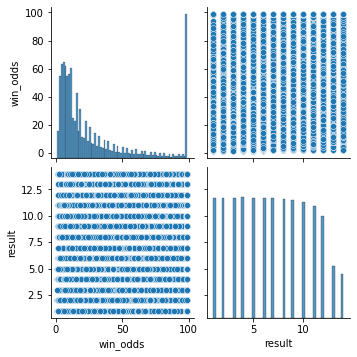

In [ ]:
sns.pairplot(data[['win_odds', 'result']], diag_kind='hist')
pass

В диаграмме никакой зависимости между этими признаками нет, лошади с маленьким шансом на победу также побеждают в забегах

Какие часто выставляются шансы на победу той или иной лошади

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


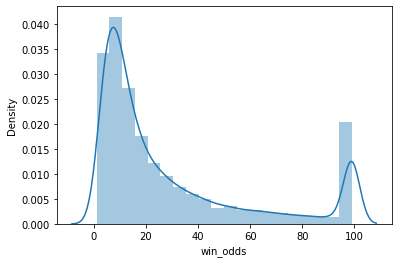

In [ ]:
sns.distplot(data['win_odds'], bins=20)
pass

# Обработка пропущенных значений

In [ ]:
data.isna().sum()

race_id                0
horse_no               0
horse_id               0
result                 0
won                    0
lengths_behind         0
horse_age              0
horse_country          2
horse_type             2
horse_rating           0
declared_weight        0
actual_weight          0
draw                   0
position_sec1          0
position_sec2          0
position_sec3          0
position_sec4      33221
position_sec5      69368
position_sec6      78151
behind_sec1            0
behind_sec2            0
behind_sec3            0
behind_sec4        33221
behind_sec5        69368
behind_sec6        78151
time1                  0
time2                  0
time3                  0
time4              33221
time5              69368
time6              78151
finish_time            0
win_odds               0
place_odds          3735
trainer_id             0
jockey_id              0
dtype: int64

Ранее выяснили, что в наборе данных имеется пропущенные значения, теперь можно определить те признаки, которые содержат наименьшую информацию

Замена медианой количественных признаков

In [ ]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Замена модой категориальных признаков в наборе данных

In [ ]:
data.horse_country.fillna(data.horse_country.mode().iloc[0], inplace=True)
data.horse_type.fillna(data.horse_type.mode().iloc[0], inplace=True)

Проверка

In [ ]:
data.isna().sum()

race_id            0
horse_no           0
horse_id           0
result             0
won                0
lengths_behind     0
horse_age          0
horse_country      0
horse_type         0
horse_rating       0
declared_weight    0
actual_weight      0
draw               0
position_sec1      0
position_sec2      0
position_sec3      0
position_sec4      0
position_sec5      0
position_sec6      0
behind_sec1        0
behind_sec2        0
behind_sec3        0
behind_sec4        0
behind_sec5        0
behind_sec6        0
time1              0
time2              0
time3              0
time4              0
time5              0
time6              0
finish_time        0
win_odds           0
place_odds         0
trainer_id         0
jockey_id          0
dtype: int64

# Категориальные признаки

Используем метод бинаризации

In [ ]:
hc_dummies = pd.get_dummies(data.horse_country)
ht_dummies = pd.get_dummies(data.horse_type)

In [ ]:
hc_dummies

,ARG,AUS,BRZ,CAN,FR,GB,GER,GR,IRE,ITY,JPN,NZ,SAF,SPA,USA,ZIM
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79442,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79443,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
79444,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
79445,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
ht_dummies

,Brown,Colt,Filly,Gelding,Grey,Horse,Mare,Rig,Roan
0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
79442,0,0,0,1,0,0,0,0,0
79443,0,0,0,1,0,0,0,0,0
79444,0,0,0,1,0,0,0,0,0
79445,0,0,0,1,0,0,0,0,0


Обновим набор данных

In [ ]:
data.drop(['horse_country', 'horse_type'], axis=1, inplace=True)
data = pd.concat((data, hc_dummies), axis=1)
data = pd.concat((data, ht_dummies), axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79447 entries, 0 to 79446
Data columns (total 59 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   race_id          79447 non-null  int64  
 1   horse_no         79447 non-null  int64  
 2   horse_id         79447 non-null  int64  
 3   result           79447 non-null  int64  
 4   won              79447 non-null  float64
 5   lengths_behind   79447 non-null  float64
 6   horse_age        79447 non-null  int64  
 7   horse_rating     79447 non-null  int64  
 8   declared_weight  79447 non-null  float64
 9   actual_weight    79447 non-null  int64  
 10  draw             79447 non-null  int64  
 11  position_sec1    79447 non-null  int64  
 12  position_sec2    79447 non-null  int64  
 13  position_sec3    79447 non-null  int64  
 14  position_sec4    79447 non-null  float64
 15  position_sec5    79447 non-null  float64
 16  position_sec6    79447 non-null  float64
 17  behind_sec1 

# Нормализация

Воспользуемся линейным преобразованием, приводящем все значения к нулевому среднему и единичному среднеквадратичному отклонению

In [ ]:
norm = (data - data.mean(axis = 0))/data.std(axis = 0)
norm.describe()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_rating,declared_weight,actual_weight,...,ZIM,Brown,Colt,Filly,Gelding,Grey,Horse,Mare,Rig,Roan
count,79447.000000,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,...,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04,7.944700e+04
mean,0.000000,5.732852e-17,-1.216331e-16,-1.124659e-16,-1.164905e-17,2.754631e-17,4.579127e-17,1.552610e-16,-2.023402e-15,6.251581e-16,...,-7.333758e-18,7.011788e-17,2.432661e-17,8.138682e-18,-1.824496e-16,8.406990e-18,5.008420e-17,-7.154886e-19,-3.505894e-17,-1.430977e-18
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.731139,-1.570348e+00,-1.728882e+00,-1.565099e+00,-2.949890e-01,-1.964817e-01,-1.527602e+00,-4.343844e+00,-6.607369e+00,-3.128962e+00,...,-1.229085e-02,-1.625020e-01,-6.207885e-02,-2.327075e-02,-4.376499e+00,-1.462950e-02,-1.181073e-01,-5.481488e-02,-4.406971e-02,-2.458727e-02
25%,-0.865938,-7.726260e-01,-8.779350e-01,-7.609163e-01,-2.949890e-01,-1.295895e-01,-3.870437e-01,-8.808600e-02,-6.889370e-01,-7.500847e-01,...,-1.229085e-02,-1.625020e-01,-6.207885e-02,-2.327075e-02,2.284903e-01,-1.462950e-02,-1.181073e-01,-5.481488e-02,-4.406971e-02,-2.458727e-02
50%,0.000353,2.509563e-02,3.599449e-03,4.326586e-02,-2.949890e-01,-6.269734e-02,-3.870437e-01,-8.808600e-02,-4.737260e-02,4.287431e-02,...,-1.229085e-02,-1.625020e-01,-6.207885e-02,-2.327075e-02,2.284903e-01,-1.462950e-02,-1.181073e-01,-5.481488e-02,-4.406971e-02,-2.458727e-02
75%,0.868008,8.228172e-01,8.655269e-01,8.474481e-01,-2.949890e-01,1.905979e-02,-3.870437e-01,-8.808600e-02,6.583483e-01,8.358334e-01,...,-1.229085e-02,-1.625020e-01,-6.207885e-02,-2.327075e-02,2.284903e-01,-1.462950e-02,-1.181073e-01,-5.481488e-02,-4.406971e-02,-2.458727e-02
max,1.731845,1.886446e+00,1.725101e+00,1.919691e+00,3.389915e+00,2.951852e+01,7.596867e+00,6.550897e+00,4.235070e+00,1.628792e+00,...,8.136031e+01,6.153691e+00,1.610834e+01,4.297187e+01,2.284903e-01,6.835418e+01,8.466770e+00,1.824299e+01,2.269104e+01,4.067094e+01


# Обучающая и тестовая выборки

Разобьем данные на обучающую и тестовую выборки в соотношении 9:1

In [ ]:
from sklearn.model_selection import train_test_split

x = norm.drop(['horse_id', 'won'], axis=1)
y = data['won']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 71)

train, _ = x_train.shape 
test,  _ = x_test.shape 

train, test

(71502, 7945)

## KNN

Определим оптимальное количество соседей

In [ ]:
%%time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

g = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 30)}).fit(x_train, y_train)

print('Ошибка : ', 1 - g.best_score_)
print('Оптимальное количество соседей: ', g.best_estimator_.n_neighbors)

Ошибка :  0.06623591288789521
Оптимальное количество соседей:  7
CPU times: user 50min 21s, sys: 2min 12s, total: 52min 34s
Wall time: 43min 21s


In [ ]:
%%time
knn = KNeighborsClassifier(n_neighbors = g.best_estimator_.n_neighbors).fit(x_train, y_train)

print(f"Ошибка на обучающей выборке: {np.mean(y_train != knn.predict(x_train))}")
print(f"Ошибка на тестовой выборке: {np.mean(y_test != knn.predict(x_test))}")

Ошибка на обучающей выборке: 0.048418226063606615
Ошибка на тестовой выборке: 0.06607929515418502
CPU times: user 2min 19s, sys: 5.64 s, total: 2min 24s
Wall time: 1min 58s


## SVC

In [ ]:
%%time

from sklearn.svm import SVC
svc = SVC(gamma='auto').fit(x_train, y_train)

print(f"Ошибка на обучающей выборке: {np.mean(y_train != svc.predict(x_train))}")
print(f"Ошибка на тестовой выборке: {np.mean(y_test != svc.predict(x_test))}")

Ошибка на обучающей выборке: 0.002153785908086487
Ошибка на тестовой выборке: 0.004531151667715544
CPU times: user 2min 10s, sys: 381 ms, total: 2min 11s
Wall time: 2min 10s


## Random Forest

In [ ]:
%%time

from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100).fit(x_train, y_train)

print(f"Ошибка на обучающей выборке: {np.mean(y_train != rf.predict(x_train))}")
print(f"Ошибка на тестовой выборке: {np.mean(y_test != rf.predict(x_test))}")

Ошибка на обучающей выборке: 0.0
Ошибка на тестовой выборке: 0.0
CPU times: user 5.76 s, sys: 34.5 ms, total: 5.8 s
Wall time: 5.8 s


## Extra Trees

In [ ]:
%%time

ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(x_train, y_train)

print(f"Ошибка на обучающей выборке: {np.mean(y_train != ert.predict(x_train))}")
print(f"Ошибка на тестовой выборке: {np.mean(y_test  != ert.predict(x_test))}")

Ошибка на обучающей выборке: 0.0
Ошибка на тестовой выборке: 0.0
CPU times: user 9.11 s, sys: 33.7 ms, total: 9.15 s
Wall time: 9.14 s


## Adaptive Boost

In [ ]:
%%time

ada = ensemble.AdaBoostClassifier(n_estimators=100).fit(x_train, y_train)

print(f"Ошибка на обучающей выборке: {np.mean(y_train != ada.predict(x_train))}")
print(f"Ошибка на тестовой выборке: {np.mean(y_test  != ada.predict(x_test))}")

Ошибка на обучающей выборке: 0.0
Ошибка на тестовой выборке: 0.0
CPU times: user 179 ms, sys: 1.98 ms, total: 180 ms
Wall time: 180 ms


## Gradient Boosting

In [ ]:
%%time

gbt = ensemble.GradientBoostingClassifier(n_estimators=100).fit(x_train, y_train)

print(f"Ошибка на обучающей выборке: {np.mean(y_train != gbt.predict(x_train))}")
print(f"Ошибка на тестовой выборке: {np.mean(y_test  != gbt.predict(x_test))}")

Ошибка на обучающей выборке: 0.0
Ошибка на тестовой выборке: 0.0
CPU times: user 14.4 s, sys: 43.6 ms, total: 14.4 s
Wall time: 14.4 s


### Сравнение результатов

При помощи метода `KNN` на оптимальном количестве соседей в диапазоне от 1 до 30 ошибка выборки достигла до 6.6%. Он оказался худшим из всех методов, как по времени выполнения, так и по точности. Остальные методы имеют нулевую ошибку, но разное время выполнения



# Несбалансированность классов

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

x_train_und, x_test_und, y_train_und, y_test_und = train_test_split(x, y, test_size=0.1, random_state=71)
rus = RandomUnderSampler()
x_train_und, y_train_und = rus.fit_resample(x_train_und, y_train_und)

In [ ]:
%%time
g = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 30)}).fit(x_train_und, y_train_und)

print('Ошибка : ', 1 - g.best_score_)
print('Оптимальное количество соседей: ', g.best_estimator_.n_neighbors)

Ошибка :  0.11245176445766736
Оптимальное количество соседей:  8
CPU times: user 1min 35s, sys: 16.3 s, total: 1min 51s
Wall time: 1min 24s


In [ ]:
%%time
knn = KNeighborsClassifier(n_neighbors = g.best_estimator_.n_neighbors).fit(x_train_und, y_train_und)

print(f"Ошибка на обучающей выборке: {np.mean(y_train_und != knn.predict(x_train_und))}")
print(f"Ошибка на тестовой выборке: {np.mean(y_test_und != knn.predict(x_test_und))}")

Ошибка на обучающей выборке: 0.0810598111227702
Ошибка на тестовой выборке: 0.16677155443675268
CPU times: user 6.81 s, sys: 1.58 s, total: 8.39 s
Wall time: 7.49 s


Борьба с несбалансированностью классов привела к увеличению ошибки

# Исключение коррелированных переменных

Чтобы уменьшить время выполнения работы классификатора, можно исключить коррелированные переменные, они представляют одну информацию для модели, но обрабатываются все

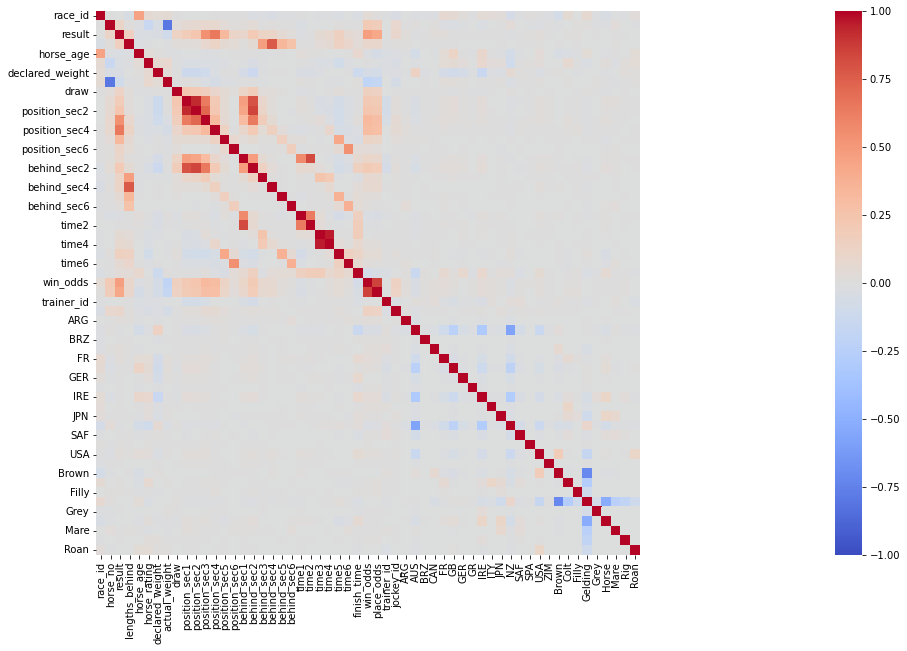

In [ ]:
plt.subplots(figsize=(70, 10))
sns.heatmap(x.corr(), square=True, vmin = -1, vmax = 1, cmap='coolwarm')
pass

In [ ]:
new_data = pd.DataFrame(data = x)
corr_mat = new_data.corr()
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

time3           time4            0.957795
position_sec1   position_sec2    0.928896
win_odds        place_odds       0.857253
position_sec2   behind_sec2      0.848470
behind_sec1     time2            0.829744
position_sec1   behind_sec2      0.799990
lengths_behind  behind_sec4      0.770309
position_sec2   position_sec3    0.724334
result          position_sec4    0.650790
position_sec3   behind_sec2      0.646923
position_sec1   position_sec3    0.637941
time1           time2            0.635097
behind_sec1     time1            0.571686
position_sec6   time6            0.544062
result          position_sec3    0.539793
dtype: float64

Получили пары с большой корреляцией, поэтому исключим по одному параметру из каждой пары

In [ ]:
x_new = x.drop(['time4', 'position_sec2', 'place_odds', 'behind_sec2', 'time2', 'behind_sec2', 'behind_sec4', 'position_sec3',
               'position_sec4', 'time1', 'time6'], axis=1)
y = data['won']

Протестируем KNN

In [ ]:
x_train_update, x_test_update, y_train_update, y_test_update = train_test_split(x_new, y, test_size = 0.1, random_state = 71)

train, _ = x_train_update.shape 
test,  _ = x_test_update.shape 

train, test

(71502, 7945)

In [ ]:
%%time
g = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 30)}).fit(x_train_update, y_train_update)

print('Ошибка : ', 1 - g.best_score_)
print('Оптимальное количество соседей: ', g.best_estimator_.n_neighbors)

Ошибка :  0.07029173763094465
Оптимальное количество соседей:  7
CPU times: user 50min 23s, sys: 2min 40s, total: 53min 3s
Wall time: 43min 46s


In [ ]:
%%time
knn = KNeighborsClassifier(n_neighbors = g.best_estimator_.n_neighbors).fit(x_train_update, y_train_update)

print(f"Ошибка на обучающей выборке: {np.mean(y_train_update != knn.predict(x_train_update))}")
print(f"Ошибка на тестовой выборке: {np.mean(y_test_update != knn.predict(x_test_update))}")

Ошибка на обучающей выборке: 0.05534110933959889
Ошибка на тестовой выборке: 0.06809314033983638
CPU times: user 2min 17s, sys: 6.93 s, total: 2min 24s
Wall time: 1min 59s


После исключения коррелированных переменных ошибка не изменилась, как и ожидалось

# Общие выводы 

При выполнени данной домашней работы были освоено:

* Работа с библиотеками машинного обучения
* Визуализации данных и вычисление основных характеристик
* Обработка пропущенных значений и категориальных признаков
* Нормализация данных
* Разбиение данных на обучающую и тестовую выборки
* Классификатор ближайших соседей
* Борьба с несбалансированностью классов
* Исключение коорелированных переменных
